# Problem Description: 

In the rapidly evolving landscape of cybersecurity, protecting computer networks and systems from unauthorized access, misuse, and attacks is a critical concern. Traditional security mechanisms such as firewalls and antivirus software are often insufficient in identifying sophisticated or previously unknown threats. This necessitates the development of advanced Intrusion Detection Systems (IDS) capable of monitoring network or system activities in real time and accurately distinguishing between normal and malicious behavior.

The core problem is to design and implement an effective Intrusion Detection System that can:

Analyze large volumes of network traffic or system logs efficiently,

Accurately detect a wide range of cyber-attacks (e.g., DoS, probe, R2L, U2R),

Minimize false positives and false negatives,

Adapt to evolving threat patterns and zero-day attacks.

The solution must leverage appropriate algorithms (e.g., machine learning, deep learning, or rule-based approaches) and be evaluated against standard datasets (such as NSL-KDD, CICIDS2017, etc.) to ensure reliability, scalability, and robustness in detecting intrusions in real-world scenarios.

### **What is an INTRUSION DETECTOR?** 

Intrusion detector is a software used to detect network intrusions. It protects a computer network from unauthorized users, including perhaps insiders.

### **Dataset**

To carry out this research, we will utilize the "NSL-KDD" dataset, which is a widely recognized benchmark dataset for intrusion detection. The dataset can be accessed from the following link: https://www.unb.ca/cic/datasets/nsl.html

### **Different Categories of the Attacks:-**

#### **Denial-of-service(DOS) :-**
A Denial-of-Service (DoS) attack is an attack meant to shut down a machine or network, making it inaccessible to its intended users. DoS attacks accomplish this by flooding the target with traffic, or sending it information that triggers a crash.e.g. syn flood;

#### **Remote 2 Local(R2L) attack:-**
Remote to local attack (r2l) has been widely known to be launched by an attacker to gain unauthorized access to a victim machine in the entire network.

#### **User to root attack (U2R) attack:-** 
This attack is usually launched for illegally obtaining the root’s privileges when legally accessing a local machine. , e.g. guessing password, various "buffer overflow" attacks;

#### **Probing:-**
Probing is an attack in which the hacker scans a machine or a. networking device in order to determine weaknesses or. vulnerabilities that may later be exploited so as to. compromise the system. e.g., port scanning.

# Importing necessary Libraries and importing dataset:- 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
features = ['protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type','duration']

In [5]:
data = pd.read_csv('KDDTest+.txt', names=features, header=None)


# Preview the DataSet:-

In [8]:
data.head()

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type,duration
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
0,icmp,eco_i,SF,20,0,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
1,tcp,telnet,RSTO,0,15,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22544 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                22544 non-null  object 
 1   service                      22544 non-null  object 
 2   flag                         22544 non-null  object 
 3   src_bytes                    22544 non-null  int64  
 4   dst_bytes                    22544 non-null  int64  
 5   land                         22544 non-null  int64  
 6   wrong_fragment               22544 non-null  int64  
 7   urgent                       22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted             

In [12]:
data.describe()

,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,duration
count,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])

The no of data points are: 22544
The no of features are: 42
Some of the features are: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins']


In [16]:
output = data['intrusion_type'].values
labels = set(output)

In [18]:
print('The different type of output labels are:',labels)
print('='*100)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'ftp_write', 'saint', 'apache2', 'buffer_overflow', 'land', 'xsnoop', 'normal', 'phf', 'satan', 'multihop', 'named', 'xlock', 'udpstorm', 'pod', 'smurf', 'mailbomb', 'snmpgetattack', 'imap', 'rootkit', 'httptunnel', 'ps', 'portsweep', 'neptune', 'processtable', 'ipsweep', 'guess_passwd', 'perl', 'sendmail', 'nmap', 'mscan', 'loadmodule', 'xterm', 'teardrop', 'sqlattack', 'warezmaster', 'back', 'snmpguess', 'worm'}
No. of different output labels are: 38


#  Data Cleaning:- 

### **Checking for NULL values:-**

In [22]:
print('Null values in the dataset are: ', len(data[data.isnull().any(axis=1)]))


Null values in the dataset are:  0


### **Checking for DUPLICATE values:-**

In [25]:
duplicateRowsDF = data[data.duplicated()]

In [27]:
duplicateRowsDF.head(5)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type,duration
7252,tcp,telnet,SF,0,44,0,0,0,0,0,...,0.97,0.02,0.0,0.0,0.33,0.34,0.04,0.02,processtable,18
3,tcp,pop_3,SF,32,93,0,0,0,0,0,...,0.94,0.02,0.0,0.0,0.00,0.00,0.02,0.00,guess_passwd,18
7294,tcp,telnet,SF,0,44,0,0,0,0,0,...,0.90,0.11,0.0,0.0,0.50,0.55,0.11,0.01,processtable,18
3,tcp,pop_3,SF,30,93,0,0,0,0,0,...,0.98,0.01,0.0,0.0,0.00,0.00,0.00,0.00,guess_passwd,17
7342,tcp,telnet,SF,0,44,0,0,0,0,0,...,0.89,0.02,0.0,0.0,0.27,0.30,0.01,0.00,processtable,14


In [29]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(22416, 42)

In [31]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')

# Exploratory Data Analysis:-

### **Distribution of categories in class label:-**

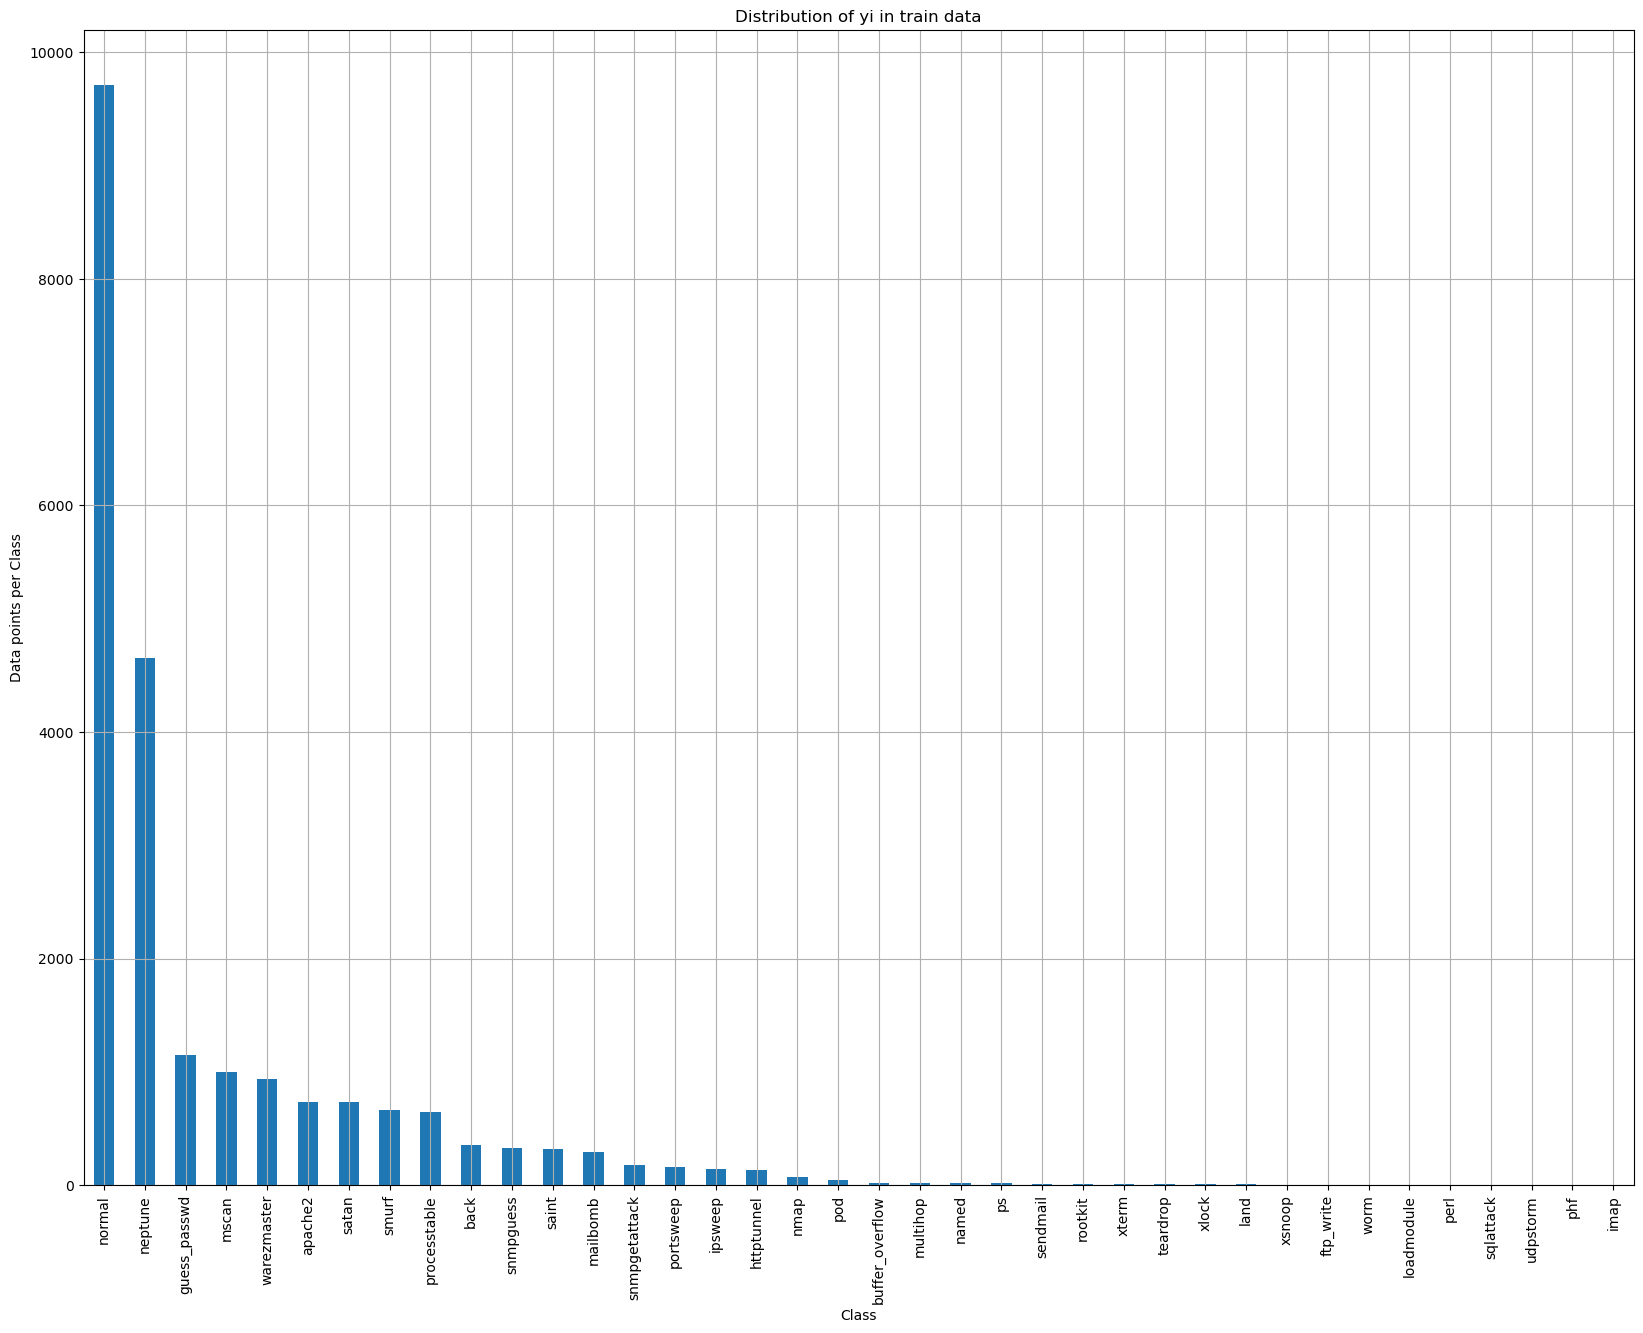

Number of data points in class 1 : 9711 ( 43.322 %)
Number of data points in class 2 : 4657 ( 20.775 %)
Number of data points in class 3 : 1152 ( 5.139 %)
Number of data points in class 4 : 996 ( 4.443 %)
Number of data points in class 5 : 938 ( 4.185 %)
Number of data points in class 6 : 737 ( 3.288 %)
Number of data points in class 7 : 735 ( 3.279 %)
Number of data points in class 8 : 665 ( 2.967 %)
Number of data points in class 9 : 643 ( 2.868 %)
Number of data points in class 10 : 358 ( 1.597 %)
Number of data points in class 11 : 331 ( 1.477 %)
Number of data points in class 12 : 319 ( 1.423 %)
Number of data points in class 13 : 293 ( 1.307 %)
Number of data points in class 14 : 178 ( 0.794 %)
Number of data points in class 15 : 157 ( 0.7 %)
Number of data points in class 16 : 141 ( 0.629 %)
Number of data points in class 17 : 133 ( 0.593 %)
Number of data points in class 18 : 73 ( 0.326 %)
Number of data points in class 19 : 41 ( 0.183 %)
Number of data points in class 20 : 20 

In [35]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')



- Most of the data points are from "normal" (good connections) category which is around 53.72 %.


- In the categories that belong to bad connections, "neptune." (33.046 %) and "back." (2.913 %) have the highest no. of data points.


- Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least no. of data points with less than 10 data points per class.


- The dataset is highly imbalanced, thus we will need to build a model which should be able to classify data points from these low distribution classes accurately.

# Performance metrics for the problem:-

- As the dataset is highly imbalanced, we will need to build a model which should be able to classify the INTRUSION categories accurately.


- We will use the CONFUSION MATRIX as that will help us to determine how well the data points belonging to each of the 23 classes are classified.


- Along with the confusion matrix, we will also calculate precision, recall and weighted f1-score to determine the best model.


- Although not preferred for imbalanced datasets, but we will also display the accuracy score that will give us an estimate of the total no. of correctly classified points.


- Some important evaluation scores that can be added for this problem are the TPR (True Positive rate) and FPR (False Positive Rate) scores.

 For this problem, we want our FPR to be as low as possible. This is because, a "Normal" connection getting dropped beacuse of getting misclassified as a "Bad" connection is less severe compared to a "Bad" connection getting misclassified as a "Normal" connection, which may result in a security threat. 

### **Train Test Split:-**

In [42]:
X = data.drop("intrusion_type", axis = 1)
Y = data["intrusion_type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state= 45)

In [44]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(16812, 41)
(16812,)
Test data
(5604, 41)
(5604,)


# Vectorizing Categorical features using one-hot encoding:- 

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

### **Protocol_type:-**

In [49]:
protocol = data["protocol_type"].unique()
print('Protocol types are:', protocol)

Protocol types are: ['tcp' 'icmp' 'udp']


In [51]:
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [53]:
print(train_protocol[1].toarray())
train_protocol.shape

[[1 0 0]]


(16812, 3)

<h5> Service:- </h5>

In [56]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['smtp', 'urp_i', 'http_443', 'finger', 'ssh', 'whois', 'netbios_dgm', 'telnet', 'Z39_50', 'nnsp', 'vmnet', 'nntp', 'netbios_ns', 'netstat', 'other', 'shell', 'courier', 'http', 'private', 'login', 'name', 'bgp', 'pop_3', 'rje', 'imap4', 'tim_i', 'domain_u', 'ftp', 'daytime', 'supdup', 'ecr_i', 'pm_dump', 'pop_2', 'netbios_ssn', 'gopher', 'klogin', 'efs', 'time', 'IRC', 'kshell', 'ctf', 'sunrpc', 'discard', 'exec', 'systat', 'ftp_data', 'mtp', 'ntp_u', 'remote_job', 'ldap', 'uucp', 'sql_net', 'domain', 'hostnames', 'auth', 'link', 'echo', 'eco_i', 'iso_tsap', 'X11', 'uucp_path', 'csnet_ns', 'printer']


In [58]:
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:1364: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [60]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [62]:
train_service.shape

(16812, 63)

<h5> Flag:- </h5>

In [65]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['SF', 'S0', 'OTH', 'S3', 'S1', 'RSTOS0', 'RSTO', 'SH', 'REJ', 'S2', 'RSTR']


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [69]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 0 0 0 0 1 0 0 0 0 0]]


(16812, 11)

In [71]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

<h3> Applying Standardisation on the continuous features of our dataset:- </h3>

In [74]:
def feature_scaling(X_train, X_test, feature_name):

    '''
    This function performs standardisation on the features
    '''

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))

    return scaler1, scaler2

<h5>  Duration:- </h5>

In [77]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
print(duration1[1])

[-0.00940071]


<h5>  src_bytes :- </h5>

In [80]:
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')

In [82]:
print(src_bytes1[1])

[-0.02191261]


<h5>dst_bytes:-</h5>

In [85]:
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')

In [87]:
print(dst_bytes1[1])

[-0.09664663]


<h5>wrong_fragment:-</h5>

In [90]:
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')

In [92]:
print(wrong_fragment1[1])

[-0.052838]


<h5>urgent :-</h5>

In [95]:
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')

In [97]:
print(urgent1[1])

[-0.02148735]


<h5>hot :-</h5>

In [100]:
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')

In [102]:
print(hot1[1])

[-0.16367299]


<h5>num_failed_logins</h5>

In [105]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')

In [107]:
print(num_failed_logins1[1])

[-0.1431444]


<h5>num_compromised :-</h5>

In [110]:
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')

In [112]:
num_compromised1[1]

array([-0.01772853])

<h5>root_shell :-</h5>

In [115]:
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')

In [117]:
root_shell1[1]

array([-0.05122544])

<h5>su_attempted :-</h5>

In [120]:
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')

In [122]:
su_attempted1[1]

array([-0.01463484])

<h5>num_root:-</h5>

In [125]:
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')

In [127]:
num_root1[1]

array([-0.01591261])

<h5>num_file_creations:-</h5>

In [130]:
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')

In [132]:
num_file_creations1[1]

array([-0.04010166])

<h5>num_shells:-</h5>

In [135]:
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')

In [137]:
num_shells1[1]

array([-0.02931977])

<h5>num_access_files:-</h5>

In [140]:
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')

In [142]:
num_access_files1[1]

array([-0.05216285])

<h5>num_outbound_cmds:-</h5>

In [145]:
data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22416
Name: count, dtype: int64

  <h5>- We will not use 'num_outbound_cmds' feature as it has all zero values.</h5>

<h5>srv_count:-</h5>

In [149]:
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')

In [151]:
srv_count1[1]

array([-0.33966231])

<h5>serror_rate:-</h5>

In [154]:
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')

In [156]:
serror_rate1[1]

array([-0.18326628])

<h5>srv_serror_rate:-</h5>

In [159]:
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')

In [161]:
srv_serror_rate1[1]

array([-0.35016207])

<h5>rerror_rate:-</h5>

In [164]:
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')

In [166]:
rerror_rate1[1]

array([1.69623493])

<h5>srv_rerror_rate :-</h5>

In [169]:
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')

In [171]:
srv_rerror_rate1[1]

array([1.8218438])

<h5>same_srv_rate:-</h5>

In [174]:
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')

In [176]:
same_srv_rate1[1]

array([-1.78209997])

<h5>diff_srv_rate:-</h5>

In [179]:
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')

In [181]:
diff_srv_rate1[1]

array([3.4533732])

<h5>srv_diff_host_rate:-</h5>

In [184]:
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')

In [186]:
srv_diff_host_rate1[1]

array([-0.38880061])

<h5>dst_host_count:-</h5>

In [189]:
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')

In [191]:
dst_host_count1[1]

array([0.6517445])

<h5>dst_host_srv_count:-</h5>

In [194]:
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')

In [195]:
dst_host_srv_count1[1]

array([-1.24143169])

<h5>dst_host_same_srv_rate:-</h5>

In [199]:
dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')

In [201]:
dst_host_same_srv_rate1[1]

array([-1.38626575])

<h5>dst_host_diff_srv_rate:-</h5>

In [204]:
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [206]:
dst_host_diff_srv_rate1[1]

array([4.07020546])

<h5>dst_host_same_src_port_rate:-</h5>

In [209]:
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')

In [211]:
dst_host_same_src_port_rate1[1]

array([-0.40220939])

<h5>dst_host_srv_diff_host_rate:-</h5>

In [214]:
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')

In [216]:
dst_host_srv_diff_host_rate1[1]

array([-0.23096849])

<h5>dst_host_serror_rate:-</h5>

In [219]:
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')

In [221]:
dst_host_serror_rate1[1]

array([-0.13944589])

<h5>dst_host_srv_serror_rate:-</h5>

In [224]:
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')

In [226]:
dst_host_srv_serror_rate1[1]

array([-0.35288868])

<h5>dst_host_rerror_rate:-</h5>

In [229]:
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')

In [231]:
dst_host_rerror_rate1[1]

array([1.81051067])

<h5>dst_host_srv_rerror_rate:-</h5>

In [234]:
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')

In [236]:
dst_host_srv_rerror_rate1[1]

array([1.90999103])

<h5>num_failed_logins :-</h5>

In [239]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')

In [241]:
num_failed_logins1[1]

array([-0.1431444])

<h5>land:-</h5>

In [244]:
land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])

In [246]:
land1.shape

(1, 16812)

<h5>is_host_login :-</h5>

In [249]:
is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])

In [251]:
is_host_login1.shape

(1, 16812)

<h5>is_guest_login :-</h5>

In [254]:
is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])

In [256]:
is_guest_login1.shape

(1, 16812)

<h5>logged_in :-</h5>

In [259]:
logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])

In [261]:
logged_in1.shape

(1, 16812)

<h5>count:-</h5>

In [264]:
count1, count2 = feature_scaling(X_train, X_test, 'count')

In [266]:
count1[1]

array([2.72635356])

<h5>dst_host_diff_srv_rate:-</h5>

In [269]:
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [270]:
dst_host_diff_srv_rate1[1]

array([4.07020546])

<h3> Merging categorical and continuous features:- </h3>


np.hstack is a NumPy function that horizontally stacks arrays. It concatenates the arrays along the second axis (axis index 1), which means it combines them side by side.

In [274]:
from scipy.sparse import hstack

In [275]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

In [276]:
X_train_1.shape

(16812, 114)

In [277]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

In [278]:
X_test_1.shape

(5604, 114)


joblib is a Python library that provides tools to create lightweight pipelining in Python. It is particularly designed for efficiently saving and loading large NumPy arrays, which can be crucial in machine learning and data-intensive applications. The library is often used for parallel processing and efficient memory management.

In [286]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

In [288]:
joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

<h3> Further Approach to our problem </h3>

- <h6> We will first apply below classifiers on our dataset and evaluate their performance: </h6>
    
    
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
   
    
    
- <h6> Based on the performance metric scores we obtain from the above classifiers, we will apply below feature engineering techniques on our dataset to get additional features: </h6>
    
    
  
        
        
- <h6> We will then apply the best performing classifiers from dataset 1 on dataset 2 and evaluate their performance. </h6>

<h2> Applying Machine Algorithms:- </h2>

<h5> Utility Functions:- </h5>

In [366]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [368]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [370]:
def model(model_name, X_train, Y_train, X_test, Y_test):

    '''
    This function computes the performance scores on the train and test data.
    '''

    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print(' ')

    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print(' ')

    print('Performance metrics:')
    print(' ')
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print(' ')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print(' ')
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print(' ')
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model

    return results_tr, results_test

In [372]:
def print_grid_search_attributes(model):

    '''
    This function prints all the grid search attributes
    '''

    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

<h3> Model_1:- Logistic Regression </h3>

setting up a grid search for hyperparameter tuning for a logistic regression model using Stochastic Gradient Descent (SGD) as the optimization algorithm.

Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Completed
Time taken: 0:01:38.269746
 


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Prediction on test data:
Completed
Time taken: 0:00:00.023781
 
Performance metrics:
 
Confusion Matrix is:


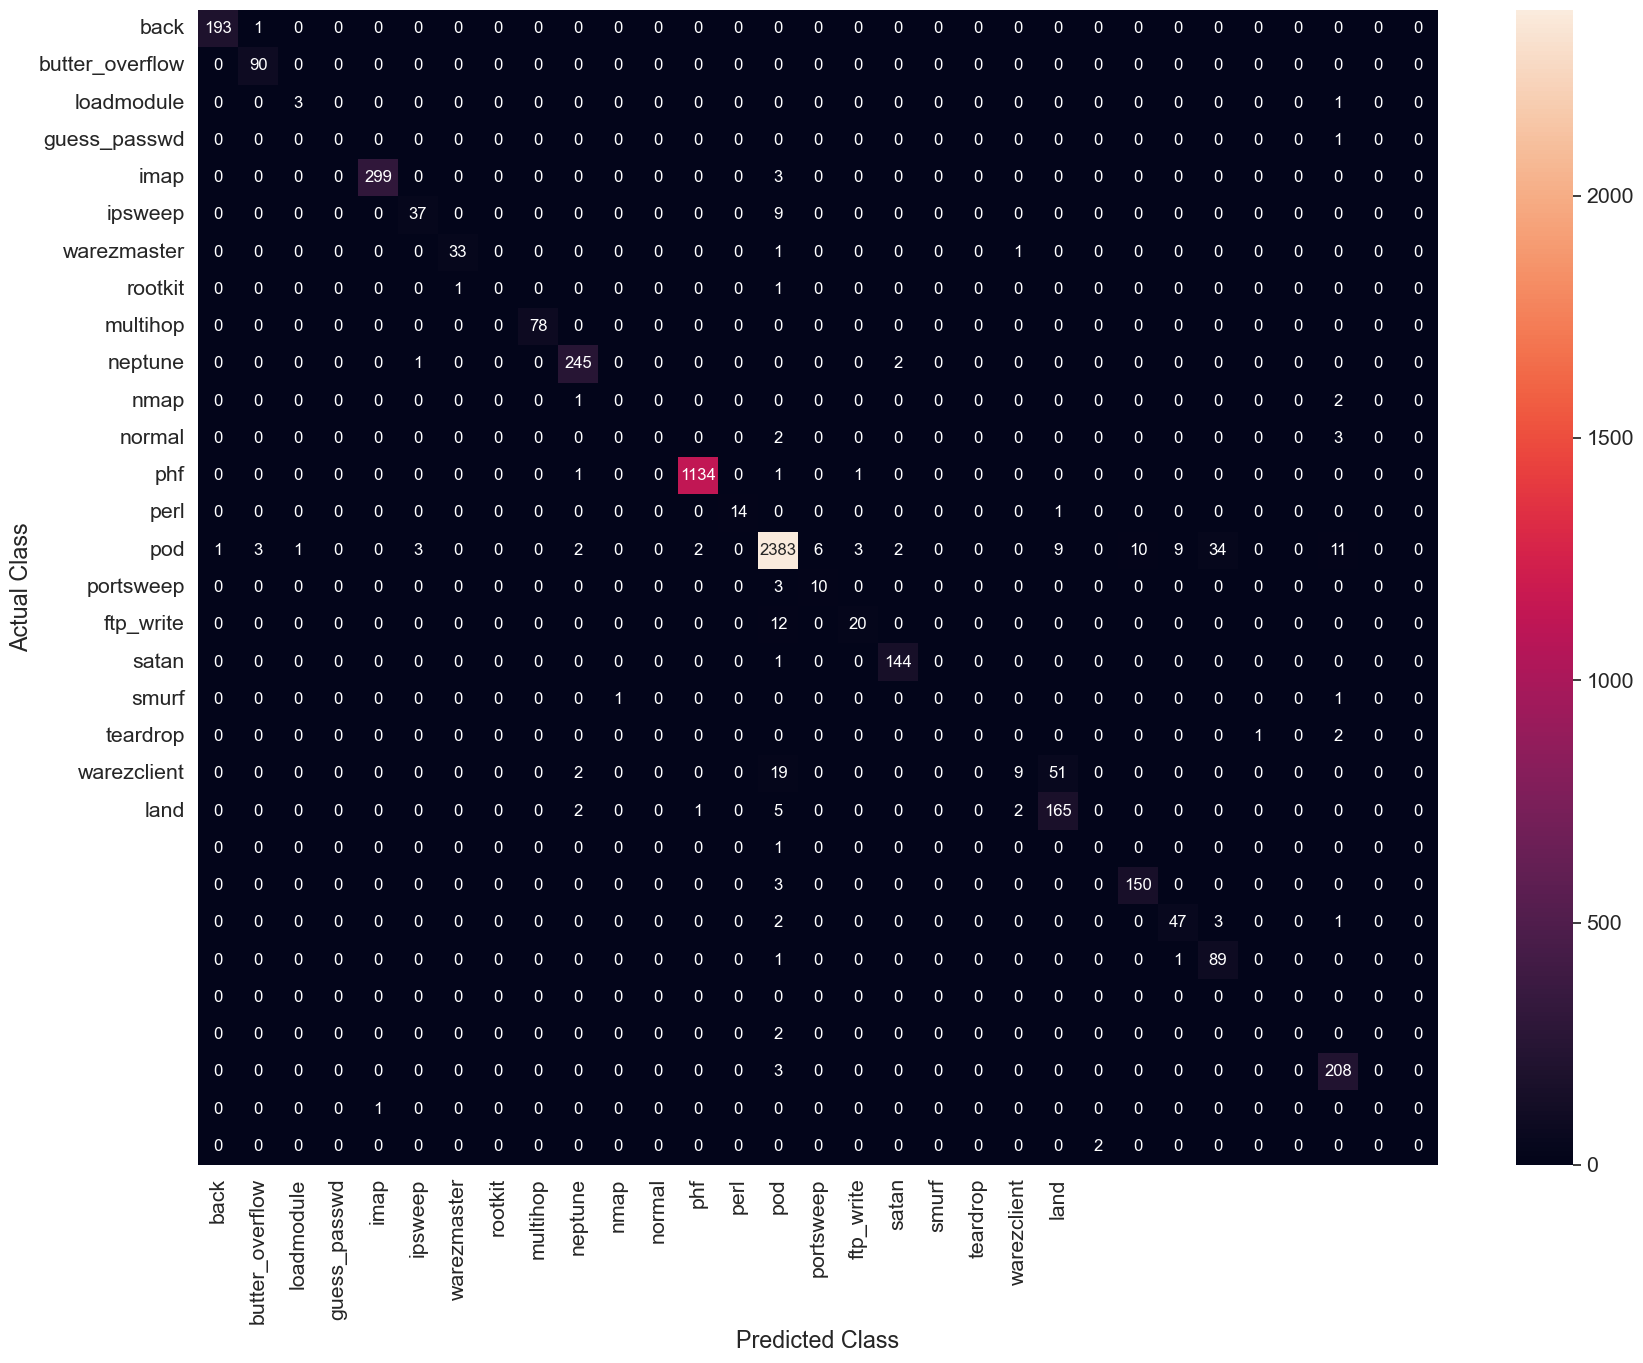

 
Precision score is:
0.9531883123191673
 
Recall score is:


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklea

0.954853675945753
 
F1-score is:
0.9495696060257889


In [376]:
hyperparameter = {'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l1', 'l2']}
from sklearn.linear_model import SGDClassifier

# Use 'log' or 'hinge' as the loss function, depending on your problem
lr = SGDClassifier(loss='hinge')  # Change 'log' to 'hinge' or 'log' as needed

lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

lr_grid_results_tr, lr_grid_results_test = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)


In [307]:
print_grid_search_attributes(lr_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=0.001, penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 0.001, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9539022391377066



In [310]:
joblib.dump(lr_grid.best_estimator_, 'lr_gs.pkl')

['lr_gs.pkl']

In [312]:
lr_gs = lr_grid.best_estimator_
y_tr_pred = lr_gs.predict(X_train_1.toarray())
y_test_pred = lr_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [314]:
lr_grid_results_tr

{'precision': 0.9463002120422936,
 'recall': 0.9492624315964787,
 'f1_score': 0.9464783032208016}

In [316]:
tpr_fpr_train

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

In [318]:
lr_grid_results_test

{'precision': 0.9462764613647798,
 'recall': 0.948429693076374,
 'f1_score': 0.9464316621503147,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [320]:
tpr_fpr_test

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

<h3> Model_2 :- Decision Tree </h3>

In [323]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Completed
Time taken: 0:00:11.300184
 
Prediction on test data:
Completed
Time taken: 0:00:00.006900
 
Performance metrics:
 
Confusion Matrix is:


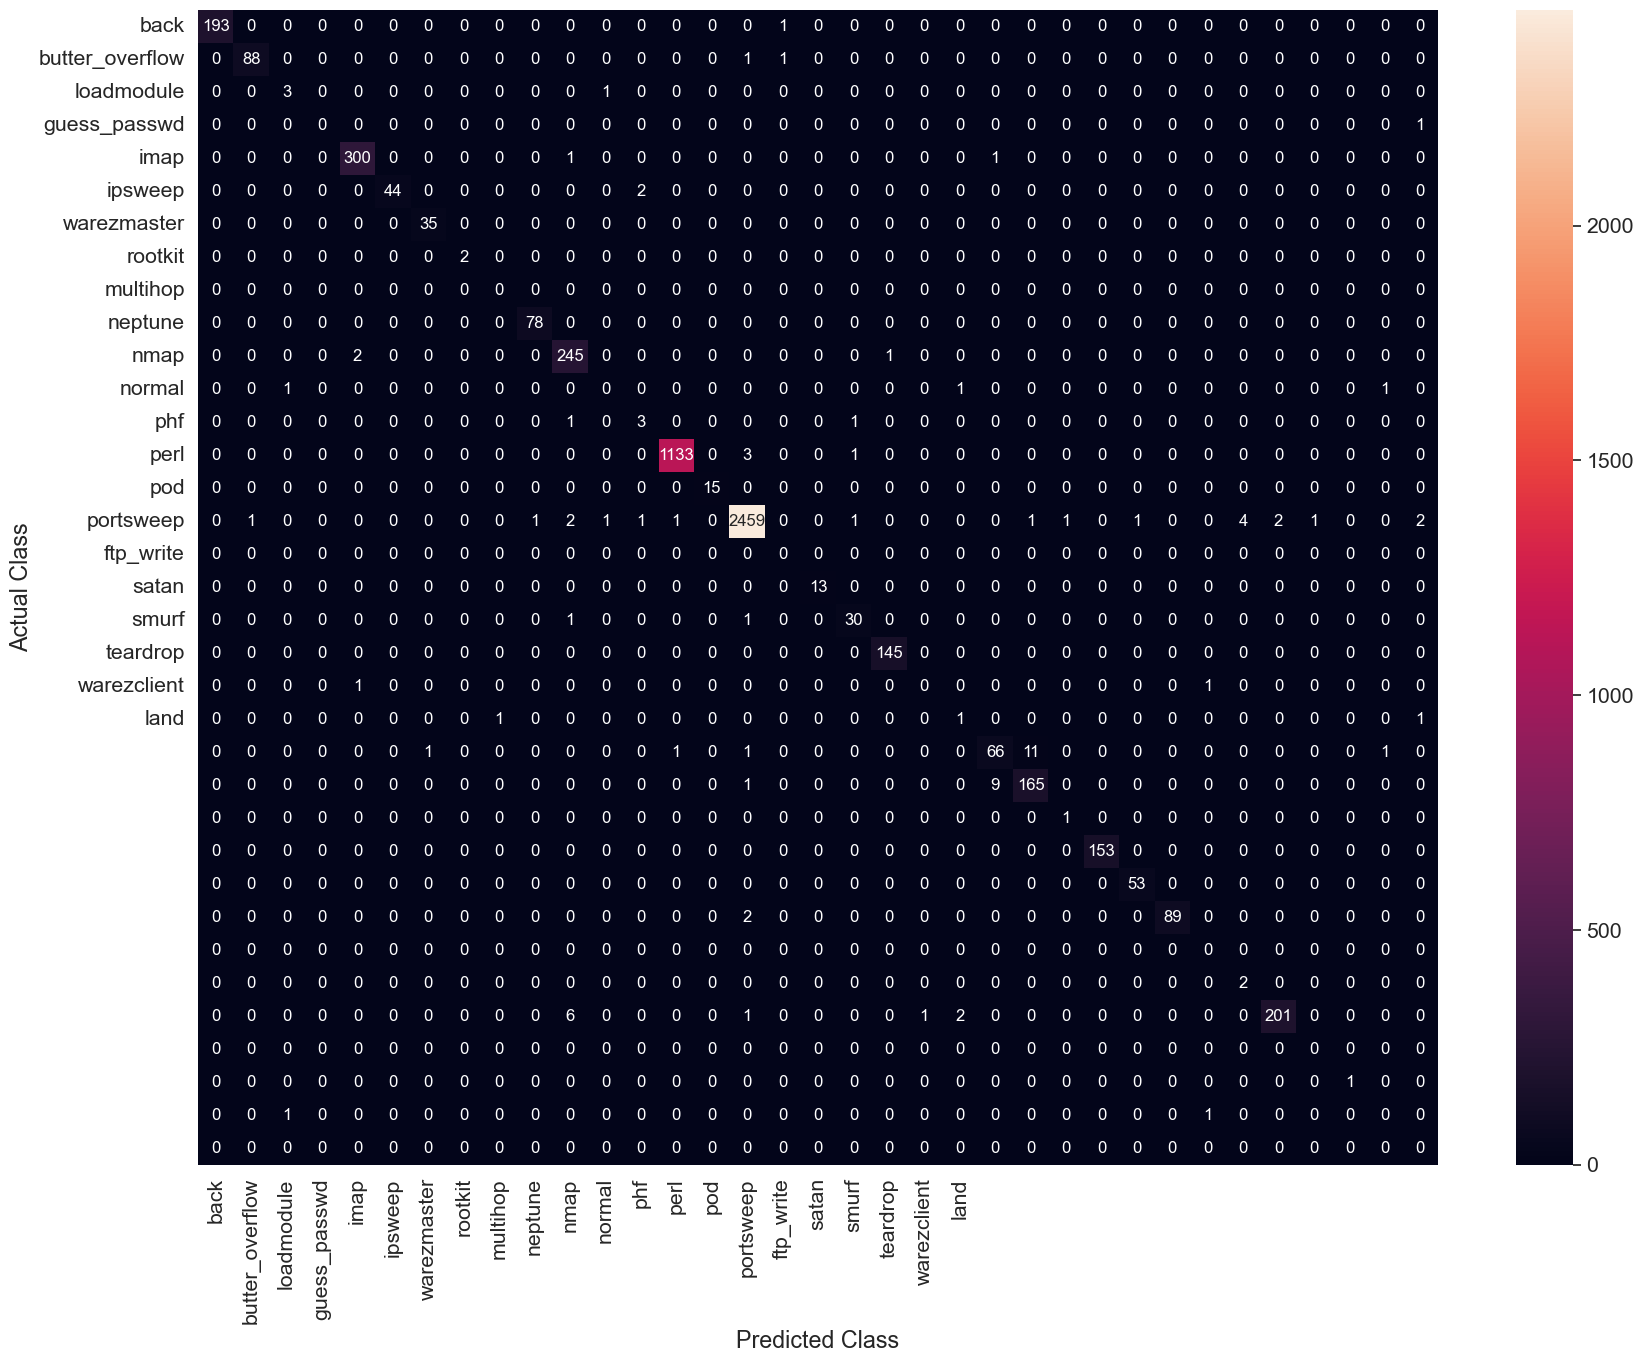

 
Precision score is:
0.9867363756111065
 
Recall score is:


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklea

0.9846538187009279
 
F1-score is:
0.9855568485616848


In [325]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [327]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', max_depth=500,
                       min_samples_split=5)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9826314537235309



In [329]:
joblib.dump(decision_tree_grid.best_estimator_, 'decision_tree_gs.pkl')

['decision_tree_gs.pkl']

In [331]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_1.toarray())
y_test_pred = dt_gs.predict(X_test_1.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [333]:
decision_tree_grid_results_tr

{'precision': 0.9982072787131018,
 'recall': 0.9979181536997382,
 'f1_score': 0.9979958054257096}

In [335]:
dt_tpr_fpr_train

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

In [337]:
decision_tree_grid_results_test

{'precision': 0.9867363756111065,
 'recall': 0.9846538187009279,
 'f1_score': 0.9855568485616848,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [339]:
dt_tpr_fpr_test

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

<h3> Model_3 :- Random Forest </h3>

In [342]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Completed
Time taken: 0:04:29.716166
 
Prediction on test data:
Completed
Time taken: 0:00:00.305029
 
Performance metrics:
 
Confusion Matrix is:


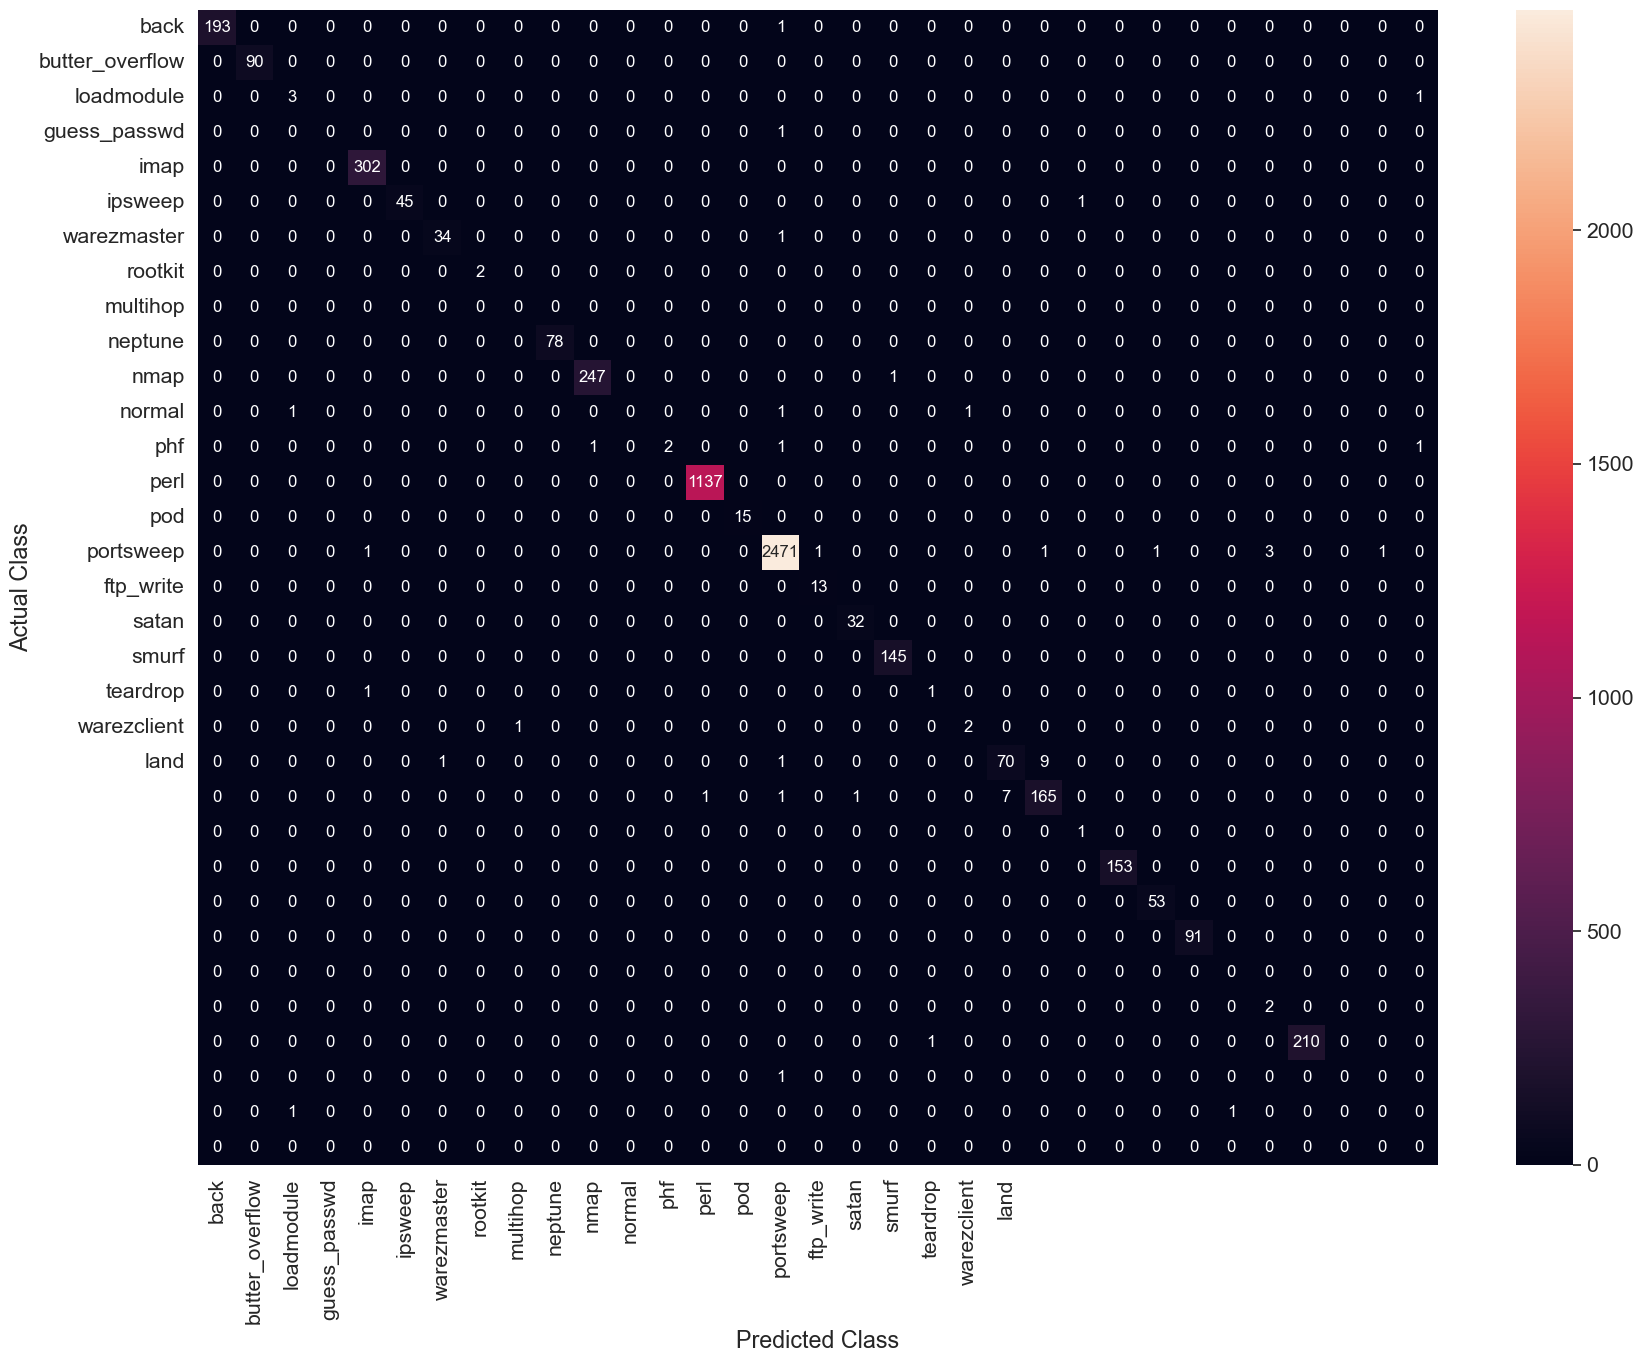

 
Precision score is:
0.9916983404177447
 
Recall score is:


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9916131334760885
 
F1-score is:
0.9914585355344703


C:\Users\ncmre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [344]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [346]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=100,
                       min_samples_split=5)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 100, 'min_samples_split': 5, 'n_estimators': 100}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9891743992386389



In [348]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [349]:
rf_grid_results_tr

{'precision': 0.9990916179713792,
 'recall': 0.9990482988341661,
 'f1_score': 0.9990553745125654}

In [350]:
rf_tpr_fpr_train

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

In [351]:
rf_grid_results_test

{'precision': 0.9916983404177447,
 'recall': 0.9916131334760885,
 'f1_score': 0.9914585355344703,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [356]:
rf_tpr_fpr_test

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

In [358]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

['rf_gs.pkl']

Among all the three models Ranom forest gives abetter score